# Homework 1 - Numpy - First Neural Network

In [ ]:
# Package imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Import for dataset
import sklearn.datasets

import time
from IPython import display

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

Can you make a perfect classifier? Let's consider the next dataset:

In [ ]:
np.random.seed(0)

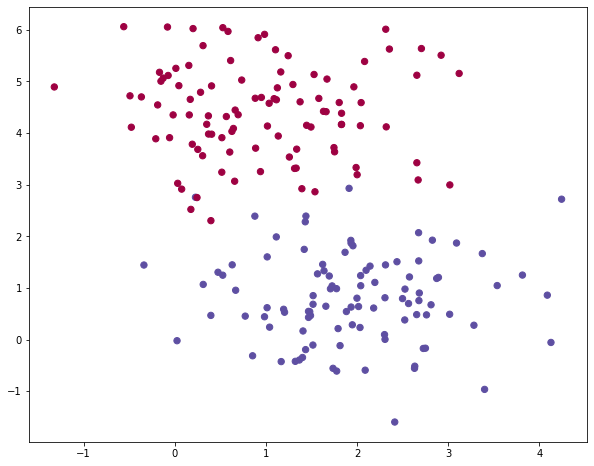

In [ ]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200, centers=2, cluster_std=0.9)
X[0] += 1.5
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral);

In [ ]:
def activation(x):
    return np.where( x > 0 , 1, 0)

def perceptron(x, w):
    return activation(np.dot(x, w))

def perceptron_with_bias(x, w):
    return activation(np.dot(x, w[1:]) + w[0])

In [ ]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the countour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.plasma)
    plt.show()

In [ ]:
def train_and_plot(X, w, num_iteration, LR, with_bias=True):
    for j in range(num_iteration):
        # get predicts
        if with_bias:
            pred = perceptron_with_bias(X, w)
        else:
            pred = perceptron(X, w)

        # how_much did we miss?
        diff = y - pred

        error = np.mean(np.abs(diff))

        # draw result
        display.clear_output(wait=True)
        if with_bias:
            plot_decision_boundary(lambda x: perceptron_with_bias(x, w))
        else:
            plot_decision_boundary(lambda x: perceptron(x, w))
        
        display.display('Error:' + str(error))
        time.sleep(0.5)


        # update weights
        if with_bias:
            w = w + LR * np.dot(np.c_[np.ones((X.shape[0], 1)), X].T, diff)
        else:
            w = w + LR * np.dot(X.T, diff)
    return

#### 1. Try to tune learning rate and number of iterations
* What is the lowest error with current approach?*

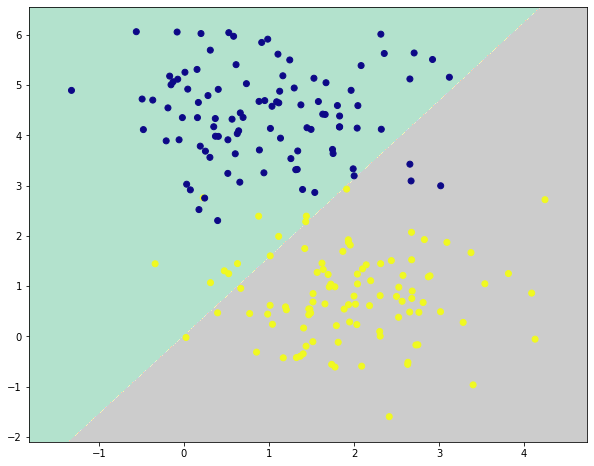

'Error:0.07'

In [ ]:
# initialize weights randomly with mean 0 - [-1; 1]
w = 2*np.random.random((2,)) - 1

train_and_plot(X=X, w=w, num_iteration=15, LR=0.1, with_bias=False)

The lowest error with current approach: *'Error:0.065'*

In [ ]:
w = 2*np.random.random((2,)) - 1

train_and_plot(X=X, w=w, num_iteration=15, LR=0.1, with_bias=False)

#### 2. It's time to add learnable bias
* What is the lowest error now?*

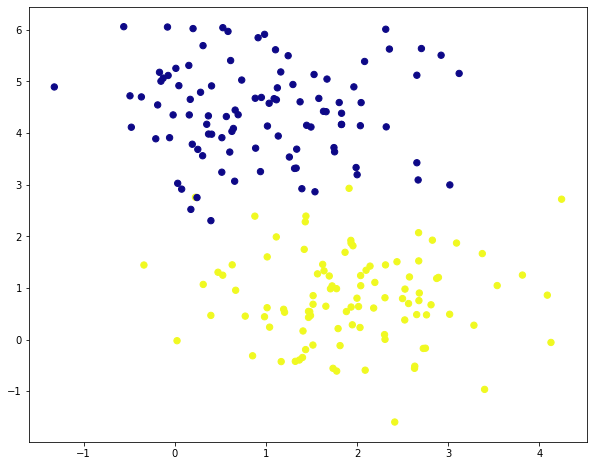

In [ ]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200, centers=2, cluster_std=0.9)
X[0] += 1.5
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.plasma);

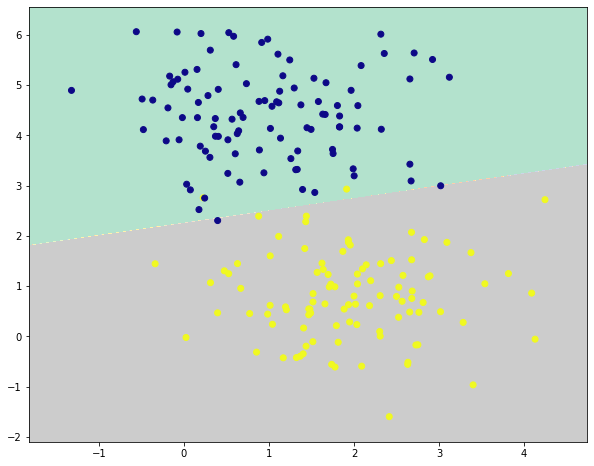

'Error:0.015'

In [ ]:
w_with_bias = 2 * np.random.random((3,)) - 1

train_and_plot(X=X, w=w_with_bias, num_iteration=75, LR=0.01, with_bias=True)

In [ ]:
def train(X, w, num_iteration, LR, with_bias=True):
    for j in range(1, num_iteration+1):
        # get predicts
        if with_bias:
            pred = perceptron_with_bias(X, w)
        else:
            pred = perceptron(X, w)

        # how_much did we miss?
        diff = y - pred

        error = np.mean(np.abs(diff))

        print(f"Iteration: {j}, Error: {error}")
        
        # update weights
        if with_bias:
            w = w + LR * np.dot(np.c_[np.ones((X.shape[0], 1)), X].T, diff)
        else:
            w = w + LR * np.dot(X.T, diff)
    return

In [ ]:
w_with_bias = 2 * np.random.random((3,)) - 1
train(X=X, w=w_with_bias, num_iteration=75, LR=0.01, with_bias=True)


Iteration: 1, Error: 0.25
Iteration: 2, Error: 0.46
Iteration: 3, Error: 0.145
Iteration: 4, Error: 0.105
Iteration: 5, Error: 0.085
Iteration: 6, Error: 0.07
Iteration: 7, Error: 0.075
Iteration: 8, Error: 0.07
Iteration: 9, Error: 0.075
Iteration: 10, Error: 0.065
Iteration: 11, Error: 0.07
Iteration: 12, Error: 0.065
Iteration: 13, Error: 0.07
Iteration: 14, Error: 0.06
Iteration: 15, Error: 0.065
Iteration: 16, Error: 0.05
Iteration: 17, Error: 0.07
Iteration: 18, Error: 0.04
Iteration: 19, Error: 0.07
Iteration: 20, Error: 0.04
Iteration: 21, Error: 0.065
Iteration: 22, Error: 0.045
Iteration: 23, Error: 0.055
Iteration: 24, Error: 0.035
Iteration: 25, Error: 0.045
Iteration: 26, Error: 0.035
Iteration: 27, Error: 0.045
Iteration: 28, Error: 0.035
Iteration: 29, Error: 0.04
Iteration: 30, Error: 0.03
Iteration: 31, Error: 0.035
Iteration: 32, Error: 0.035
Iteration: 33, Error: 0.03
Iteration: 34, Error: 0.025
Iteration: 35, Error: 0.025
Iteration: 36, Error: 0.025
Iteration: 37, E

The lowest error with learnable bias: *'Error: 0.015'*

#### 3*. Let's expand it for three classes

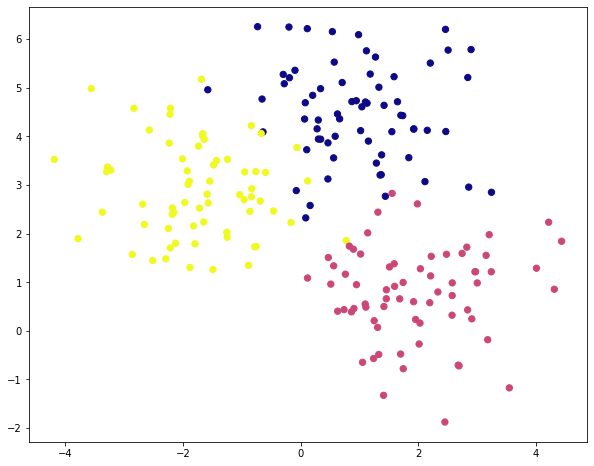

In [ ]:
np.random.seed(0)
X, y = sklearn.datasets.make_blobs(200)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.plasma);

**Idea:** we need to train weights for each class 

\begin{equation}
y_p =   \underset{c \,=\, 0,...,C-1}{\text{argmax}} \,\,\,\mathring{\mathbf{x}}_{p}^T \mathbf{w}_c^{\,}.
\end{equation}


In [ ]:
def _one_hot_enc(y, n_labels):
    matrix = np.zeros((len(y), n_labels))
    for idx, val in enumerate(y):
      matrix[idx, val] = 1
    return matrix


def _argmax(x, w):
    return np.argmax(np.dot(x, w), axis=1)


def train(X, y, num_iteration, LR):
    n_classes = np.max(y) + 1

    X = np.c_[np.ones((X.shape[0], 1)), X]
    y_enc = _one_hot_enc(y, n_classes)
    
    w = 2 * np.random.random((3, n_classes)) - 1
        
    result = {}
    for j in range(num_iteration):
        # get predicts
        pred = _argmax(X, w)

        # how_much did we miss?
        pred_enc = _one_hot_enc(pred, n_classes)
        diff = y_enc - pred_enc

        error = np.mean(np.abs(diff))

        # save error and weights on each iteration
        result[error] = w

        # update weights
        w += LR * np.dot(X.T, diff)

        # drow result
        display.clear_output(wait=True)
        plot_decision_boundary(X, w)
        display.display(f'Error: {error}. Iteration: {j+1}')
        time.sleep(0.5)

    print(f"Minimal value of error: {min(result, key=float)}, w = {result[min(result, key=float)]}")

    return


def plot_decision_boundary(X, w):
        # Set min and max values and give it some padding
        x_min, x_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        y_min, y_max = X[:, 2].min() - 0.5, X[:, 2].max() + 0.5
        h = 0.01
        
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Predict the function value for the whole grid
        Z = _argmax(np.c_[np.ones(xx.shape).ravel(), xx.ravel(), yy.ravel()], w)
        Z = Z.reshape(xx.shape)

        # Plot the countour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2)
        plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.plasma)
        plt.show()

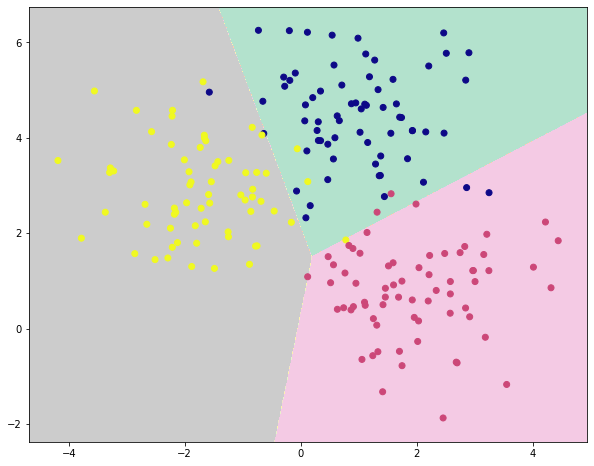

'Error: 0.03333333333333333. Iteration: 50'

Minimal value of error: 0.03, w = [[-1.23007535  1.54741271  1.20424984]
 [ 0.36457742  1.6366251  -3.41648176]
 [ 1.0003689  -1.00570488 -0.16283653]]


In [ ]:
train(X, y, num_iteration=50, LR=0.01)

Transform multiclass classification into multiple binary classification problems

In [ ]:
X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
w_with_bias = 2 * np.random.random((3, )) - 1

In [ ]:
def perceptron_model(x, w):
    return np.dot(x, w)

In [ ]:
def train(X, y, w, num_iteration, LR):
    result = {}
    for j in range(num_iteration):
        # get predicts
        pred = perceptron(X, w)

        # how_much did we miss?
        diff = y - pred

        error = np.mean(np.abs(diff))

        # save error and weights on each iteration
        result[error] = w

        # update weights
        w = w + LR * np.dot(X.T, diff)
    print(f"Minimal value of error: {min(result, key=float)}, w = {result[min(result, key=float)]}")

    return result[min(result, key=float)]

In [ ]:

# create zeros array for saving probability of classification
pred_prob = np.zeros((X.shape[0], ))

for j in range(3):
    # splitting the multi-class dataset into multiple binary classification problems
    y_temp = (y == j)
    w = 2*np.random.random((3,)) - 1
    w_for_class = train(X=X_with_bias, y = y_temp, w=w_with_bias, num_iteration=1000, LR=.1)
    pred_prob_class = perceptron_model(x=X_with_bias, w=w_for_class)
    pred_prob = np.c_[pred_prob, pred_prob_class]
    y_pred = np.argmax(pred_prob[:,1:], axis=1)

Minimal value of error: 0.045, w = [-63.44007535   7.68954719  16.84522849]
Minimal value of error: 0.02, w = [ 7.95992465  1.50570018 -5.16970784]
Minimal value of error: 0.025, w = [ 11.05992465 -14.65236956  -5.01256729]


Visualize the result of classification

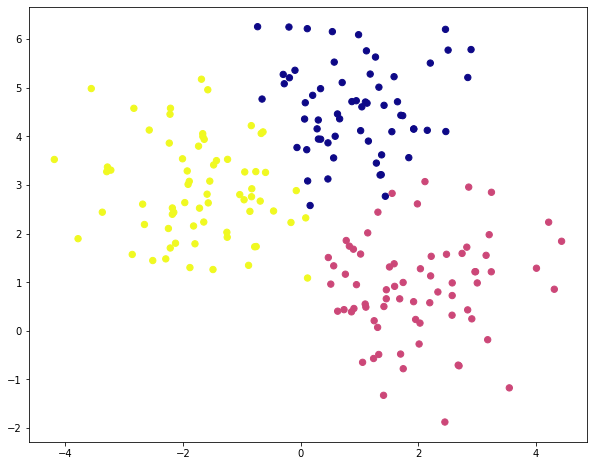

In [ ]:
plt.scatter(X[:,0], X[:,1], s=40, c=y_pred, cmap=plt.cm.plasma);

Calculate error of 3 classes clasification

In [ ]:
diff = y - y_pred
error = np.mean(np.abs(diff))
print(f"Error of classification for 3 classes: {error}")

Error of classification for 3 classes: 0.07


Plot only points that error classified

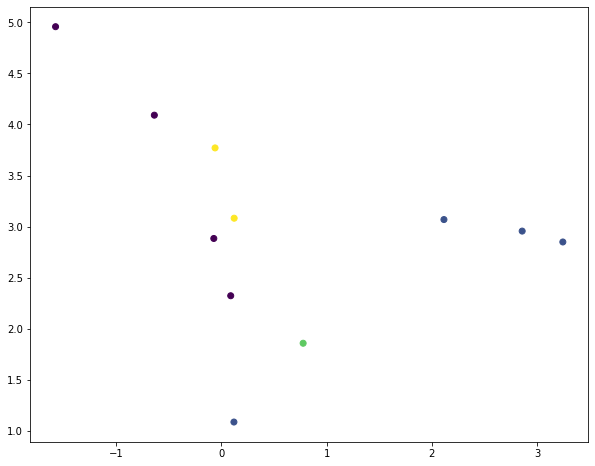

In [ ]:
X_diff = np.c_[X, diff]
X_diff = X_diff[X_diff[:, 2] != 0]
plt.scatter(X_diff [:,0], X_diff[:,1], c=X_diff [:,2]);